In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Decks_Dataset.csv',encoding="utf-8")
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode
0,Mortar/Evolution,Royal_Guards/Evolution,Skeleton_Barrel,Dark_Prince,Mother_Witch,Arrows,The_Log,Rocket,82,88761,65.90%,6,34.10%,4.0,normal_battle
1,Furnace/Evolution,Knight/Evolution,Graveyard,Poison,Ice_Wizard,Goblin_Hut,Skeletons,Barbarian_Barrel,65,70794,56.50%,4,43.50%,3.3,normal_battle
2,Goblin_Giant/Evolution,PEKKA/Evolution,Goblin_Machine,Electro_Wizard,Goblin_Curse,Bomber,Arrows,Rage,63,213251,55.70%,20,44.30%,3.9,normal_battle
3,Goblin_Cage/Evolution,Royal_Guards/Evolution,Royal_Hogs,Flying_Machine,Fireball,Zappies,Arrows,Barbarian_Barrel,62,80210,55.20%,24,44.80%,4.1,normal_battle
4,Skeleton_Barrel/Evolution,Mortar/Evolution,Skeleton_King,Cannon_Cart,Goblin_Gang,Ice_Wizard,Arrows,Spear_Goblins,61,218736,54.80%,259,45.10%,3.4,normal_battle


In [5]:
# Crear un LabelEncoder para cada columna
for col in ["carta_1", "carta_2", "carta_3", "carta_4", "carta_5", "carta_6", "carta_7", "carta_8", "game_mode"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [6]:
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode
0,12,16,17,6,15,0,12,8,82,88761,65.90%,6,34.10%,4.0,0
1,4,12,6,21,12,6,11,1,65,70794,56.50%,4,43.50%,3.3,0
2,8,15,4,8,8,2,0,7,63,213251,55.70%,20,44.30%,3.9,0
3,7,16,16,11,6,18,0,1,62,80210,55.20%,24,44.80%,4.1,0
4,15,14,18,5,9,9,0,10,61,218736,54.80%,259,45.10%,3.4,0


In [7]:
#Borrar %
df["wins"] = df["wins"].str.replace("%", "", regex=False).astype(float)
df["losses"] = df["losses"].str.replace("%", "", regex=False).astype(float)


In [8]:
df["wins"] /= 100
df["losses"] /= 100

In [9]:
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode
0,12,16,17,6,15,0,12,8,82,88761,0.659,6,0.341,4.0,0
1,4,12,6,21,12,6,11,1,65,70794,0.565,4,0.435,3.3,0
2,8,15,4,8,8,2,0,7,63,213251,0.557,20,0.443,3.9,0
3,7,16,16,11,6,18,0,1,62,80210,0.552,24,0.448,4.1,0
4,15,14,18,5,9,9,0,10,61,218736,0.548,259,0.451,3.4,0


In [10]:
df['usage'] = df['usage'].astype(str).str.replace('%', '').astype(float)

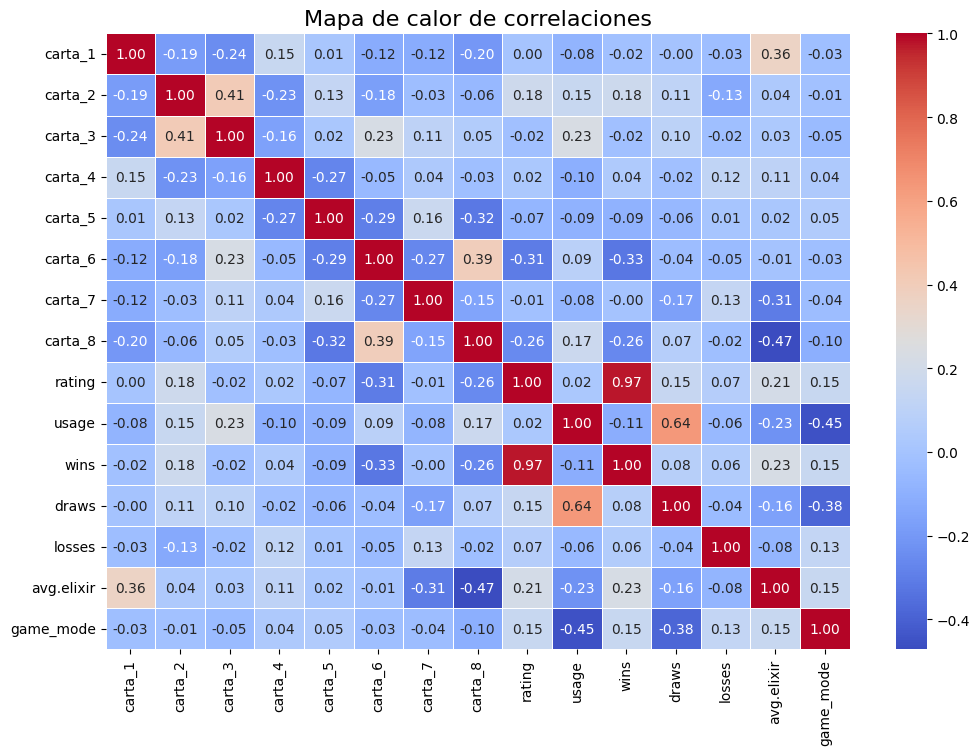

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlaciones
corr = df.corr()

# Dibujamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()


In [12]:
X = df[['carta_1', 'carta_2', 'carta_3', 'carta_4', 'carta_5', 'carta_6', 'carta_7', 'carta_8', 'usage', 'wins', 'draws', 'losses', 'avg.elixir', 'game_mode']]
y = df['rating']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf = RandomForestRegressor(
    n_estimators=100,  
    max_depth=None,    
    random_state=42
)


In [15]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = rf.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 11.89
R2 Score: 0.94
